# Point-to-point graph for football table data

A script that takes a 'wide' table of a football season and returns a point-to-point line graph.

In [44]:
import pandas as pd
import plotly.express as px

### Part A: Create dataframe
Use table location to reference a CSV of table data taken from Soccerway.com (eg: https://int.soccerway.com/national/germany/bundesliga/20202021/regular-season/r58871/tables/ - Wide Table).  Future versions will automatically scrape the Soccerway database. The next lines then makes a number of rows-wise calcluations (eg: hom points; home goals per game).

In [45]:
table_location = 'CSVs/20202021/20202021_BL_WideTable_FullSeason.csv'

df_table = pd.read_csv(table_location, index_col=False)

df_table['Home points'] = (df_table['Home W'] * 3) + df_table['Home D']
df_table['Home ppg'] = df_table['Home points'] / df_table['Home MP']
df_table['Home gfpg'] = df_table['Home F'] / df_table['Home MP']
df_table['Home gapg'] = df_table['Home A'] / df_table['Home MP']
df_table['Home dpg'] = (df_table['Home F'] - df_table['Home A'])/ df_table['Home MP']

df_table['Away points'] = (df_table['Away W'] * 3) + df_table['Away D']
df_table['Away ppg'] = df_table['Away points'] / df_table['Away MP']
df_table['Away gfpg'] = df_table['Away F'] / df_table['Away MP']
df_table['Away gapg'] = df_table['Away A'] / df_table['Away MP']
df_table['Away dpg'] = (df_table['Away F'] - df_table['Away A'])/ df_table['Away MP']

df_table

,Position,Team,Total MP,Total W,Total D,Total L,Total F,Total A,Home MP,Home W,...,Home points,Home ppg,Home gfpg,Home gapg,Home dpg,Away points,Away ppg,Away gfpg,Away gapg,Away dpg
0,1,Bayern Munich,34,24,6,4,99,44,17,13,...,43,2.529412,3.764706,1.235294,2.529412,35,2.058824,2.058824,1.352941,0.705882
1,2,RB Leipzig,34,19,8,7,60,32,17,11,...,37,2.176471,1.705882,0.764706,0.941176,28,1.647059,1.823529,1.117647,0.705882
2,3,Borussia Dortmund,34,20,4,10,75,46,17,11,...,35,2.058824,2.352941,1.176471,1.176471,29,1.705882,2.058824,1.529412,0.529412
3,4,Wolfsburg,34,17,10,7,61,37,17,10,...,34,2.000000,1.882353,0.941176,0.941176,27,1.588235,1.705882,1.235294,0.470588
4,5,Eintracht Frankfurt,34,16,12,6,69,53,17,10,...,37,2.176471,2.176471,1.176471,1.000000,23,1.352941,1.882353,1.941176,-0.058824
5,6,Bayer Leverkusen,34,14,10,10,53,39,17,8,...,29,1.705882,2.000000,1.294118,0.705882,23,1.352941,1.117647,1.000000,0.117647
6,7,Union Berlin,34,12,14,8,50,43,17,8,...,32,1.882353,1.882353,1.058824,0.823529,18,1.058824,1.058824,1.470588,-0.411765
7,8,Borussia Moenchengladbach,34,13,10,11,64,56,17,8,...,28,1.647059,1.882353,1.117647,0.764706,21,1.235294,1.882353,2.176471,-0.294118
8,9,Stuttgart,34,12,9,13,56,55,17,5,...,21,1.235294,1.588235,1.529412,0.058824,24,1.411765,1.705882,1.705882,0.000000
9,10,Freiburg,34,12,9,13,52,52,17,7,...,27,1.588235,1.941176,1.352941,0.588235,18,1.058824,1.117647,1.705882,-0.588235


### Part 2: Graph

The p2pGraph function then creates individual p2p graphs, with two teams able to be highlighted. These two teams are noted as 'home' and 'away' as this function is designed to be be used automatically each matchday to produce p2p graphs for that round's various opponents. These two teams are positioned on top of all the other teams' lines (in other words, they are moved to the bottom of the dataframe table).

Four custom style functions have been built into the graph function: 'Default', 'Minimalist', 'Pastely', 'LightBlueBack'. Access these via the chosen_style variable.

Plotly Express does not allow for subplots. There is a simple work around for displaying these p2p graphs horizontally: in a website, use a 1x4 grid (width=240px height=800px)  

In [46]:
# function

def p2pGraph(league, season, hometeam, hometeam_altname, awayteam, awayteam_altname, yaxis_label, criteriaL, criteriaR, df, chosen_style):
  
    #DF
    
    df.loc[df['Team'] == hometeam,'Team'] = hometeam_altname
    df.loc[df['Team'] == awayteam,'Team'] = awayteam_altname
    
    hometeam, awayteam = hometeam_altname, awayteam_altname
    
    pos1 = df.loc[df['Team'] == hometeam, 'Position'].values[0]
    pos2 = df.loc[df['Team'] == awayteam, 'Position'].values[0]

    df_plot = df[['Team', criteriaL, criteriaR]].copy()

    df_plot.loc[18] = df_plot.loc[pos2 - 1]
    df_plot.loc[19] = df_plot.loc[pos1 - 1]  

    df_plot = df_plot.drop([pos1-1, pos2-1])

    df_plot = df_plot.set_index('Team')
    
    
    ### STYLES ### 
    styles_df = pd.read_csv('styles.csv', index_col=0)
    
    plot_bg = styles_df.loc[chosen_style, 'Plot background']
    outer_bg = styles_df.loc[chosen_style, 'Outer background']
    hover_bg = styles_df.loc[chosen_style, 'Hover background']

    hometeam_color = styles_df.loc[chosen_style, 'Home team color']
    awayteam_color = styles_df.loc[chosen_style, 'Away team color']
    neutralteam_color = styles_df.loc[chosen_style, 'Neutral team color']

    
    ### FIG ### 
    #fig=df_plot.T.plot()   this is the shortcut of the next three lines
    
    df_plot = df_plot.T
    to_plot = [v for v in list(df_plot.columns)]
    fig = px.line(df_plot, x=df_plot.index, y=to_plot)
    
    fig.update_layout(title=f"<b>{yaxis_label}</b></br></br>{league} {season}</br></br></br></br>")
    
    fig.update_layout(
        font_family="Arial",
        font_color="#181818",
        title_font_family="Helvetica",
        title_font_color="#181818",
    )

    fig.update_layout(margin=dict(l=1, r=0, t=100, b=20),width=230,height=750)        
    fig['layout']['plot_bgcolor'] = plot_bg
    fig['layout']['paper_bgcolor'] = outer_bg
    
    
    fig.update_layout(
        xaxis={"visible":True},
        yaxis={"visible":True, 'showgrid': False}           
    )
    
    fig.update_xaxes(title=None, visible=True, showticklabels=True)
    fig.update_yaxes(title=None, visible=True, showticklabels=True)
        
    #print(fig)
    
    fig.update_layout(legend = dict(font = dict(size = 11, color = "black")))
        
    for trace in fig['data']: 
         
        if trace['name'] in [hometeam, awayteam]:
            trace['showlegend'] = True
            trace['line']['width'] = 4;
            if trace['name'] == hometeam:
                trace['line']['color'] = hometeam_color
            elif trace['name'] == awayteam:
                trace['line']['color'] = awayteam_color
            
        else:
            trace['showlegend'] = False;
            trace['line']['width'] = 2;
            trace['line']['color'] = neutralteam_color
            
        trace['hovertemplate'] = f"<b>{trace['name']}</b>" + "<br>%{x}: %{y}<extra></extra>"

        
    # legend styling    
    fig['layout']['legend']['title']['text'] = None
    fig.update_layout(legend=dict(
        orientation="h",
        xanchor="left", x=-0.25,
        yanchor="bottom", y=1,
        ))
        
    # hover label styline    
    fig['layout']['hoverlabel']['bgcolor'] = hover_bg
    fig['layout']['hoverlabel']['font']['family'] = 'Consolas'
    fig['layout']['hoverlabel']['font']['size'] = 12
    
    fig.update_layout(
        xaxis = dict(tickmode = 'array',
        tickvals = [0, 1],
        ticktext = ['Home', 'Away']
    ))
    
            
    fig.show()
    
    fig.write_html(f"Visualisations/{league}_{season}_{hometeam}_{awayteam}_{yaxis_label}_point2pointGraph.html")

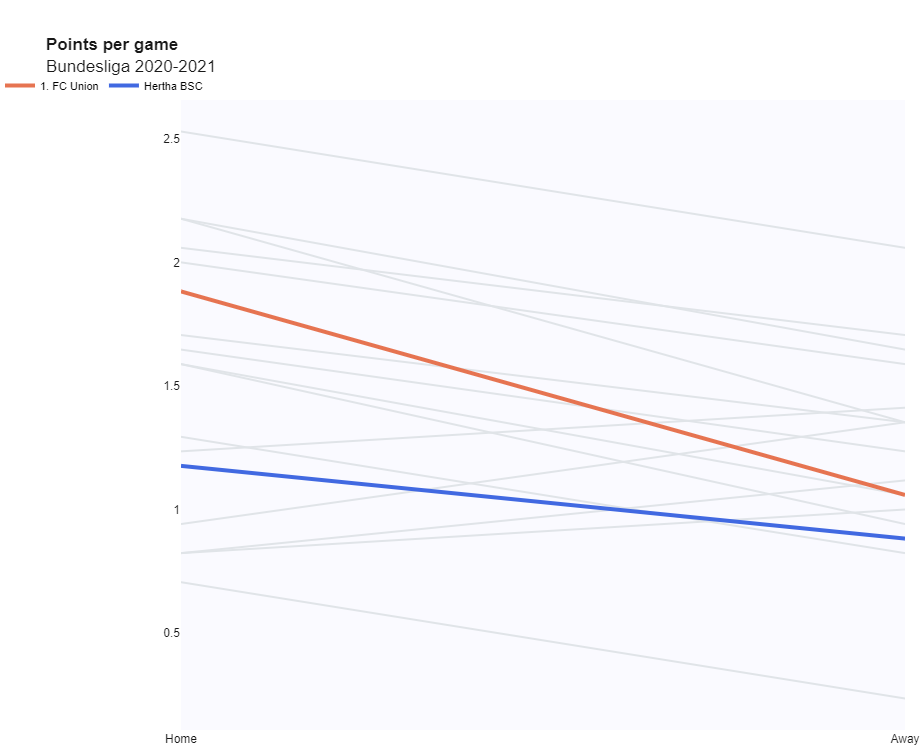

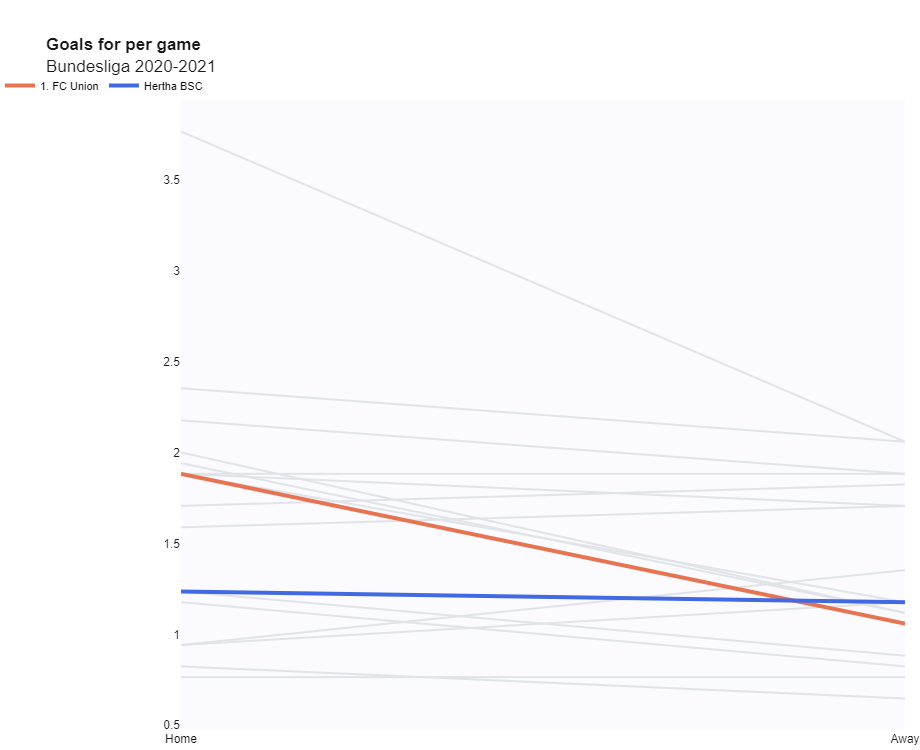

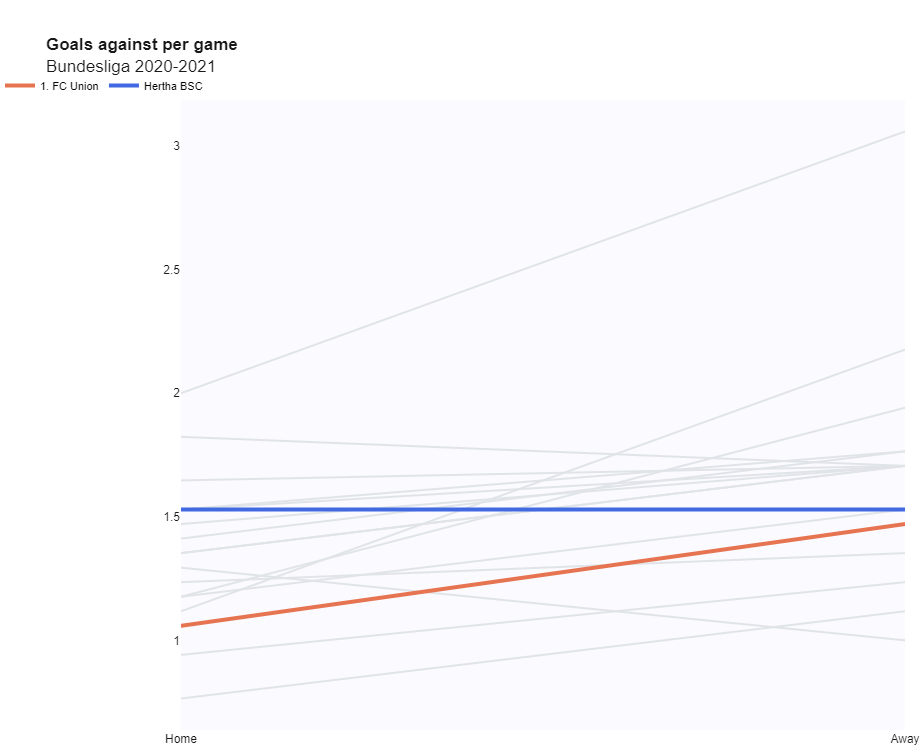

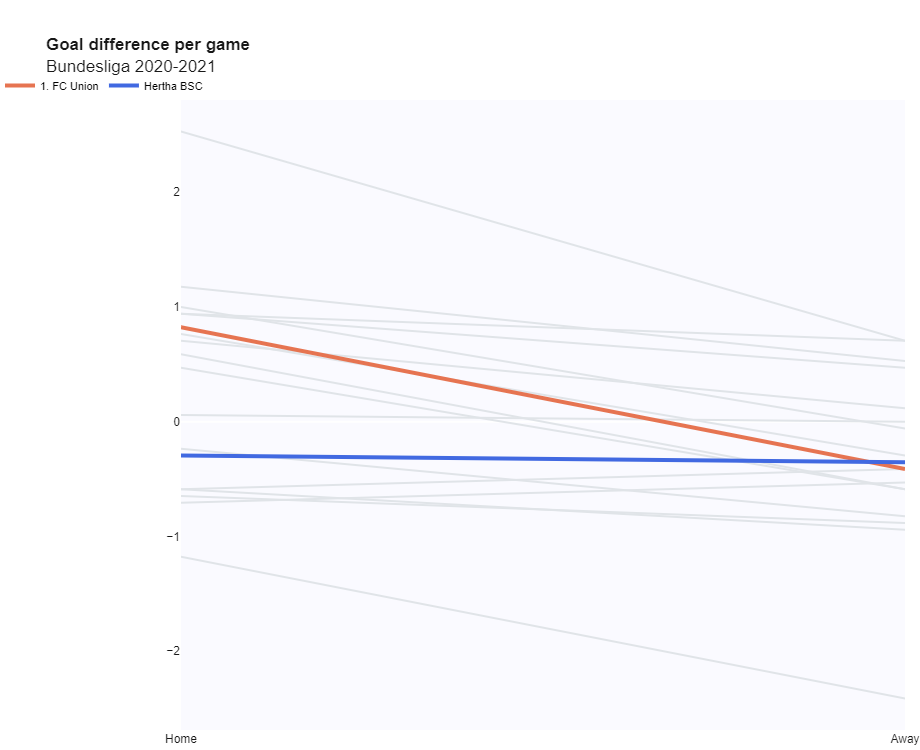

In [47]:
# ENTER DATA HERE

league = 'Bundesliga'
season = '2020-2021'
hometeam = 'Hertha Berlin'
hometeam_altname = 'Hertha BSC'
awayteam = 'Union Berlin'
awayteam_altname = '1. FC Union'
chosen_style = 'Default'

p2pGraph(league, season, hometeam, hometeam_altname, awayteam, awayteam_altname, 'Points per game', 'Home ppg', 'Away ppg', df_table, chosen_style)
p2pGraph(league, season, hometeam, hometeam_altname, awayteam, awayteam_altname, 'Goals for per game', 'Home gfpg', 'Away gfpg', df_table, chosen_style)
p2pGraph(league, season, hometeam, hometeam_altname, awayteam, awayteam_altname, 'Goals against per game', 'Home gapg', 'Away gapg', df_table, chosen_style)
p2pGraph(league, season, hometeam, hometeam_altname, awayteam, awayteam_altname, 'Goal difference per game', 'Home dpg', 'Away dpg', df_table, chosen_style)